# Get the Data


## Load the Data


In [18]:
from pathlib import Path
import pandas as pd

train_df = pd.read_csv(Path("training.csv"))
test_df = pd.read_csv(Path("testing.csv"))

## Take a quick look at the data structure


In [19]:
train_df.info()  # inspect what the columns are

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                198 non-null    object 
 1   b1                   198 non-null    int64  
 2   b2                   198 non-null    int64  
 3   b3                   198 non-null    int64  
 4   b4                   198 non-null    int64  
 5   b5                   198 non-null    int64  
 6   b6                   198 non-null    int64  
 7   b7                   198 non-null    int64  
 8   b8                   198 non-null    int64  
 9   b9                   198 non-null    int64  
 10  pred_minus_obs_H_b1  198 non-null    float64
 11  pred_minus_obs_H_b2  198 non-null    float64
 12  pred_minus_obs_H_b3  198 non-null    float64
 13  pred_minus_obs_H_b4  198 non-null    float64
 14  pred_minus_obs_H_b5  198 non-null    float64
 15  pred_minus_obs_H_b6  198 non-null    flo

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                325 non-null    object 
 1   b1                   325 non-null    int64  
 2   b2                   325 non-null    int64  
 3   b3                   325 non-null    int64  
 4   b4                   325 non-null    int64  
 5   b5                   325 non-null    int64  
 6   b6                   325 non-null    int64  
 7   b7                   325 non-null    int64  
 8   b8                   325 non-null    int64  
 9   b9                   325 non-null    int64  
 10  pred_minus_obs_H_b1  325 non-null    float64
 11  pred_minus_obs_H_b2  325 non-null    float64
 12  pred_minus_obs_H_b3  325 non-null    float64
 13  pred_minus_obs_H_b4  325 non-null    float64
 14  pred_minus_obs_H_b5  325 non-null    float64
 15  pred_minus_obs_H_b6  325 non-null    flo

## Remove columns with names starting with "pred_minus_obs"


In [21]:
# to get the col names: df.columns
# to find particular columns: df.columns.isin(columns_names)

def remove_cols(df):
    columns_to_drop = [
        col for col in df.columns if col.startswith("pred_minus_obs")]

    return df.loc[:, ~df.columns.isin(columns_to_drop)]


train_df = remove_cols(train_df)
test_df = remove_cols(test_df)

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   198 non-null    object
 1   b1      198 non-null    int64 
 2   b2      198 non-null    int64 
 3   b3      198 non-null    int64 
 4   b4      198 non-null    int64 
 5   b5      198 non-null    int64 
 6   b6      198 non-null    int64 
 7   b7      198 non-null    int64 
 8   b8      198 non-null    int64 
 9   b9      198 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 15.6+ KB


In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   325 non-null    object
 1   b1      325 non-null    int64 
 2   b2      325 non-null    int64 
 3   b3      325 non-null    int64 
 4   b4      325 non-null    int64 
 5   b5      325 non-null    int64 
 6   b6      325 non-null    int64 
 7   b7      325 non-null    int64 
 8   b8      325 non-null    int64 
 9   b9      325 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 25.5+ KB


## Count the number of instances for each class label


In [24]:
train_df

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,39,36,57,91,59,101,93,27,60
1,h,84,30,57,112,51,98,92,26,62
2,s,53,25,49,99,51,93,84,26,58
3,s,59,26,49,103,47,92,82,25,56
4,d,57,49,66,103,64,106,114,28,59
...,...,...,...,...,...,...,...,...,...,...
193,d,55,61,90,75,55,91,84,24,54
194,d,66,69,93,90,63,100,99,25,57
195,h,79,30,55,115,51,96,109,25,59
196,h,69,27,53,106,47,90,87,24,55


In [25]:
# to access a certain column
train_df.loc[:, 'class']

0      d 
1      h 
2      s 
3      s 
4      d 
       ..
193    d 
194    d 
195    h 
196    h 
197    h 
Name: class, Length: 198, dtype: object

In [26]:
train_df.loc[:, 'class'].unique()

array(['d ', 'h ', 's ', 'o '], dtype=object)

In [27]:
class_counts = train_df.loc[:, 'class'].value_counts()
class_counts

class
s     59
d     54
h     48
o     37
Name: count, dtype: int64

## See if we have an imbalanced training set


In [28]:
class_proportions = class_counts/len(train_df)
class_proportions

imbalanced_threshold = 0.1
imbalanced_classes = class_proportions[class_proportions <
                                       imbalanced_threshold]
if (len(imbalanced_classes) > 0):
    print("the dataset is imbalanced")
    print("imbalanced classes:")
    print(imbalanced_classes)
else:
    print("the dataset is balanced")

the dataset is balanced


In [29]:
# to access all the values of the data frame
train_df.values

array([['d ', 39, 36, ..., 93, 27, 60],
       ['h ', 84, 30, ..., 92, 26, 62],
       ['s ', 53, 25, ..., 84, 26, 58],
       ...,
       ['h ', 79, 30, ..., 109, 25, 59],
       ['h ', 69, 27, ..., 87, 24, 55],
       ['h ', 80, 29, ..., 102, 25, 59]], dtype=object)

# Visualise data


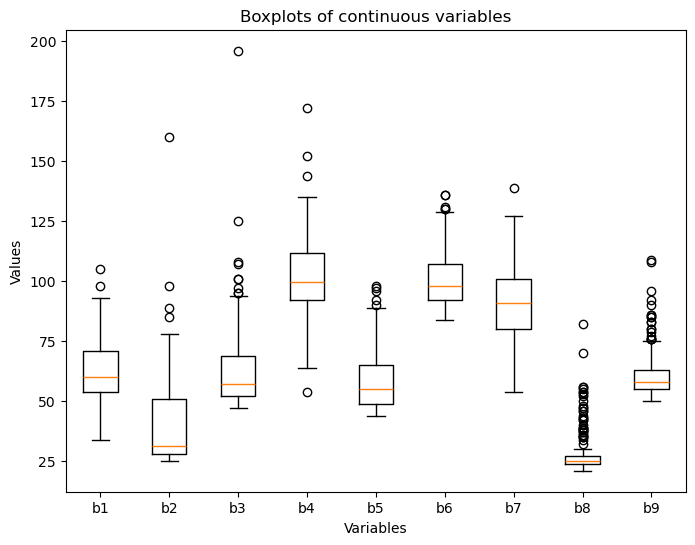

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(train_df.values[:, 1:],
            labels=train_df.columns[1:])
plt.title('Boxplots of continuous variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

# Task 6: filter observations


In [31]:
train_df['class']

0      d 
1      h 
2      s 
3      s 
4      d 
       ..
193    d 
194    d 
195    h 
196    h 
197    h 
Name: class, Length: 198, dtype: object

In [32]:
train_df['class'].isin(['s', 'd'])

0      False
1      False
2      False
3      False
4      False
       ...  
193    False
194    False
195    False
196    False
197    False
Name: class, Length: 198, dtype: bool

In [33]:
# train_df['class']
selected_train_df = train_df[train_df['class'].isin(['s ', 'd '])]
selected_test_df = test_df[test_df['class'].isin(['s ', 'd '])]

# selected_train_df = train_df[train_df['class'] == 's ']

selected_train_df

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,39,36,57,91,59,101,93,27,60
2,s,53,25,49,99,51,93,84,26,58
3,s,59,26,49,103,47,92,82,25,56
4,d,57,49,66,103,64,106,114,28,59
6,s,56,29,50,93,51,94,77,26,58
...,...,...,...,...,...,...,...,...,...,...
189,s,62,28,51,96,46,89,87,24,56
190,s,56,27,51,93,60,101,71,24,55
191,s,58,25,48,98,46,89,73,22,53
193,d,55,61,90,75,55,91,84,24,54


In [34]:
# get the number of rows
len(selected_train_df)

113

# Task 7: train a binary classifier

In [40]:
from sklearn.linear_model import LogisticRegression

X_train = selected_train_df.iloc[:, 1:]  # select from the second column
y_train_s = (selected_train_df['class'] == 's ')

X_test = selected_test_df.iloc[:, 1:]
y_test_s = (selected_test_df['class'] == 's ')

classifier = LogisticRegression(max_iter=400, solver='lbfgs')
classifier.fit(X_train, y_train_s)

y_pred = classifier.predict(X_test)

# Task 8

## Accuracy

In [60]:
# measuring accuracy using cross-validation
from sklearn.model_selection import cross_val_score

cross_val_score(classifier, X_train, y_train_s, cv=3, scoring="accuracy")

array([1., 1., 1.])

In [43]:
y_train_s

0      False
2       True
3       True
4      False
6       True
       ...  
189     True
190     True
191     True
193    False
194    False
Name: class, Length: 113, dtype: bool

## Confusion matrix

## Precision versus recall